In [1]:
import cv2
import numpy as np
import math
import mediapipe as mp
import glob
from scipy import integrate
from skimage.morphology import convex_hull_image
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from matplotlib import pyplot as plt
from IPython.display import Image, display

ModuleNotFoundError: No module named 'mediapipe'

In [104]:
img = cv2.imread("clean_reduced_dataset/men/1/1_men (93).JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
avg_luma = np.mean(img[:,:,0])
print(avg_luma)
if avg_luma>196:
    img = cv2.inRange(img,(0,133,77),(255,163,140))
else:
    img = cv2.inRange(img,(0,137,77),(255,163,140))
blur = cv2.medianBlur(img, 15)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img = cv2.dilate(blur, kernel)
ctrs, _ = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
max_ctr = max(ctrs,key=cv2.contourArea)
contour = np.zeros(img.shape)
hull = cv2.convexHull(max_ctr,False)
cv2.drawContours(contour,hull,-1,(255,255,255),1,lineType=8)
print(np.sum(contour)/255)
print(hull.shape)
# hull = convex_hull_image(contour)
# hull = np.asarray(hull,dtype=int)*255
cv2.imwrite("masked.JPG",contour)
# 140, 109, 143 Shadow
# 193, 115, 138 Skin

202.0499003558719
28.0


True

In [33]:
img = cv2.imread("clean_reduced_dataset/men/3/3_men (94).JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
avg_luma = np.mean(img[:,:,0])
print(avg_luma)
if avg_luma>196:
    img = cv2.inRange(img,(0,133,77),(255,163,140))
else:
    img = cv2.inRange(img,(0,137,77),(255,163,140))
blur = cv2.medianBlur(img, 15)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
img = cv2.dilate(blur, kernel)

cv2.imwrite("masked.JPG",img)

193.06671174377223


True

In [88]:
x=0
for filename in sorted(glob.glob('clean_reduced_dataset/men/*/*.JPG')):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
    avg_luma = np.mean(img[:,:,0])
    if avg_luma>196:
        img = cv2.inRange(img,(0,133,77),(255,163,140))
    else:
        img = cv2.inRange(img,(0,137,77),(255,163,140))
    blur = cv2.medianBlur(img, 15)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    img_masked = cv2.dilate(blur, kernel)
    ctrs, _ = cv2.findContours(img_masked,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    max_ctr = max(ctrs,key=cv2.contourArea)
    contour = np.zeros(img_masked.shape)
    cv2.drawContours(contour,max_ctr,-1,(255,255,255),1)
    cv2.imwrite(f"masks/{filename[28:]}",contour)
    x+=1
# plt.imshow(img_masked)
# np.array((0,137,77),dtype=np.uint8)
# img_masked

In [159]:
import numpy as np
import cv2

# image path
path = "./clean_reduced_dataset/men/2/"
fileName = "2_men (11).JPG"

# Reading an image in default mode:
inputImage = cv2.imread(path+fileName)

# Remove small noise via median:
filterSize = 15
imageMedian = cv2.medianBlur(inputImage, filterSize)
# imageMedian = inputImage

# Get local maximum:
kernelSize = 15
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
localMax = cv2.morphologyEx(imageMedian, cv2.MORPH_CLOSE, maxKernel, None, None, 1, cv2.BORDER_REFLECT101)

# Perform gain division
gainDivision = np.where(localMax == 0, 0, (inputImage/localMax))

# Clip the values to [0,255]
gainDivision = np.clip((255 * gainDivision), 0, 255)

# Convert the mat type from float to uint8:
gainDivision = gainDivision.astype("uint8") 

# Convert RGB to grayscale:
grayscaleImage = cv2.cvtColor(gainDivision, cv2.COLOR_BGR2GRAY)
grayscaleImage = np.uint8(cv2.normalize(grayscaleImage, grayscaleImage, 0, 255, cv2.NORM_MINMAX))
# img = cv2.cvtColor(grayscaleImage,cv2.COLOR_BGR2GRAY)
# threshValue, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# threshValue = 0.95 * threshValue
# _, binaryImage = cv2.threshold(grayscaleImage, threshValue, 255, cv2.THRESH_BINARY)
# binaryImage = cv2.bitwise_not(binaryImage)
img_masked = grayscaleImage
img_masked = cv2.inRange(img_masked,0,200)
img_masked = cv2.morphologyEx(img_masked, cv2.MORPH_CLOSE, maxKernel, None, None, 1, cv2.BORDER_REFLECT101)
# dx = cv2.Sobel(grayscaleImage,cv2.CV_64F,1,0,ksize=9)
# dy = cv2.Sobel(grayscaleImage,cv2.CV_64F,0,1,ksize=9)
# img_masked = np.linalg.norm(np.array([dx,dy]),axis=0)
# img_masked *= 255.0/np.max(img_masked)
cv2.imwrite("masked.JPG",img_masked)


True

In [171]:
img = cv2.imread("clean_reduced_dataset/men/2/2_men (139).JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
img = cv2.inRange(img,(0,135,77),(255,163,140))
kernelSize = 25
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
img_masked = cv2.morphologyEx(img_masked, cv2.MORPH_CLOSE, maxKernel, None, None, 1, cv2.BORDER_REFLECT101)
# size = (5, 5)
# shape = cv2.MORPH_RECT
# kernel = cv2.getStructuringElement(shape, size)
# img = cv2.dilate(img, kernel)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# clahe = cv2.createCLAHE(clipLimit=5)
# img[:,:] = clahe.apply(img[:,:])

# img_masked = cv2.inRange(img,(0,133,77),(205,200,140))
# img = cv2.cvtColor(img,cv2.COLOR_2BGR)
cv2.imwrite("masked.JPG",img)

True

In [385]:
img = cv2.imread("clean_reduced_dataset/men/1/1_men (92).JPG")
# img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
# # img = cv2.boxFilter(img,-1,(10,10))
# mask = cv2.inRange(img,(0,100,67),(255,255,255))
# img[mask==0]=[0,0,0]
# img = cv2.cvtColor(img,cv2.COLOR_YCrCb2BGR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
dx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=9)
dy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=9)
img_masked = np.linalg.norm(np.array([dx,dy]),axis=0)
img_masked *= 255.0/np.max(img_masked)
# img_masked = np.asarray(cv2.threshold(img_masked,thresh=50,maxval=255,type=cv2.THRESH_BINARY)[1],dtype=np.uint8)

# ctrs, _ = cv2.findContours(img_masked,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
# max_ctr = max(ctrs,key=cv2.contourArea)
# contour = np.zeros(img_masked.shape)
# cv2.drawContours(contour,max_ctr,-1,(255,0,0),1)
# histogramV = np.mean(np.sum(img_masked,axis=0))
# print(histogramV)
cv2.imwrite("masked.JPG",img_masked)
# cv2.imwrite("masked.JPG",img_masked)
# print(img_masked)

True

In [ ]:
img = cv2.cvtColor(cv2.imread("../reduced_dataset/men/4/4_men (141).JPG"),cv2.COLOR_BGR2YCrCb)
bg_mask = np.bitwise_not(cv2.inRange(img,(0,137,77),(255,163,120))).reshape((-1))
fg_mask = cv2.inRange(img,(0,137,77),(255,163,120)).reshape((-1))
# print(bg_mask.shape)
# print(img.reshape((-1,3)).shape)
# print(img.reshape((-1,3))[bg_mask == 255].shape)
bg_mean = np.mean(img.reshape((-1,3))[bg_mask == 255], axis = 0)
fg_mean = np.mean(img.reshape((-1,3))[fg_mask != 0], axis = 0)
print(bg_mean)
print(fg_mean)

# plt.imshow(img)
# img = cv2.resize(src=img,dsize=(int(img.shape[1]/8),int(img.shape[0]/8)))
# img = cv2.bilateralFilter(img,d=5,sigmaColor=10,sigmaSpace=10)
img_vector = img.reshape([-1,3])
# img_vector[:,0] = 100
divisor = 20
img_vector[:,1] = (np.tanh((img_vector[:,1] - 137)/divisor) - np.tanh((img_vector[:,1] - 163)/divisor)) * img_vector[:,1]/2
img_vector[:,2] = (np.tanh((img_vector[:,2] - 77)/divisor) - np.tanh((img_vector[:,2] - 120)/divisor)) * img_vector[:,2]/2
# (0,137,77),(255,163,120)
# cv2.imwrite("compressed.JPG",img_vector.reshape((img.shape[0],img.shape[1],3)))


# km = KMeans(n_clusters=3)
km = KMeans(n_clusters=2, init=np.array([[bg_mean[0],0,0], fg_mean]), max_iter=3)
# km = KMeans(n_clusters=3, init=np.array([bg_mean,[30, 149, 96],[200, 149, 96]]), max_iter=3)
km.fit(img_vector)

result_image = km.cluster_centers_.astype(dtype=np.uint8)[km.labels_].reshape((img.shape[0],img.shape[1],3))
# result_image = cv2.cvtColor(result_image,cv2.COLOR_YCrCb2BGR)
cv2.imwrite("compressed.JPG",result_image)

In [109]:
img = cv2.imread("clean_reduced_dataset/men/0/0_men (57).JPG")
# print(img.dtype)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = np.log(img+0.001)
# img = np.exp(img)
# print(img)
# img = np.linalg.norm(img,axis=2)
grad = np.asarray(np.gradient(img,axis=(0,1)))
# grad = np.linalg.norm(img,axis=3)
invariant_grad = cv2.threshold(grad,thresh=0.3,maxval=0,type=cv2.THRESH_TOZERO_INV)[1]
mask1 = [cv2.inRange(grad[0],0,0),cv2.inRange(grad[1],0,0)]
mask2 = [cv2.inRange(invariant_grad[0],0,0),cv2.inRange(invariant_grad[1],0,0)]
S = grad
S[0] = cv2.bitwise_and(grad[0],grad[0],cv2.bitwise_or(mask1[0],mask2[0]))
S[1] = cv2.bitwise_and(grad[1],grad[1],cv2.bitwise_or(mask1[1],mask2[1]))
# print(grad)
# print(S)
# divS = np.asarray(np.gradient(S[0],axis=0) + np.gradient(S[1],axis=1))
# print(mask1)
final_result = np.asarray(np.exp(integrate.cumtrapz(invariant_grad[0],axis=0)+4.62))
# print(final_result)
# img_masked = img
# # img = img.astype("int64")
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# dx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
# dy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
# img_masked = np.hypot(dx,dy)
# img_masked *= 255.0/np.max(img_masked)
# print(img_masked)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
# img_gray = cv2.inRange(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),0,128)
# print(img_gray)
# brightness_coeff = (np.mean(img_gray)/255 - 0.015)*10
# print(brightness_coeff) #0.016------0.6
# # img_masked = cv2.inRange(img,(0,int(142+brightness_coeff),77),(255,163,140))
# img_masked = cv2.inRange(img,(100,137,77),(255,163,140))
# img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
# img_masked_shadow = np.bitwise_not(cv2.inRange(img,(0,0,80),(255,55,178)))
# img_masked_hand = cv2.inRange(img,(5,35,30),(25,255,255))
# img_masked = np.bitwise_and(img_masked_shadow,img_masked_hand)
cv2.imwrite("masked.JPG",final_result)
del img
# del img_masked

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('D:/pattern/research/dataset_sample/men/3/3_men (2).JPG', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# # Parameters
# blur = 21
# canny_low = 15
# canny_high = 150
# min_area = 0.0005
# max_area = 0.95
# dilate_iter = 10
# erode_iter = 10
# mask_color = (0.0,0.0,0.0)
# filename = 'D:/pattern/research/dataset_sample/men/3/3_men (1).JPG'
# # Convert image to grayscale        
# img = cv2.imread(filename) 
# image_gray = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
# # Apply Canny Edge Dection
# edges = cv2.Canny(image_gray, canny_low, canny_high)

# edges = cv2.dilate(edges, None)
# edges = cv2.erode(edges, None)

# contour_info = []

# c 

# for c in cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)[0]:

#     contour_info.append((
#         c,
#         cv2.contourArea(c),
#     ))
    

# # get the contours and their areas


# # Set up mask with a matrix of 0's
# mask = np.zeros(edges.shape, dtype = np.uint8)


# # Go through and find relevant contours and apply to mask
# for contour in contour_info:
# # Instead of worrying about all the smaller contours, if the area is smaller than the min, the loop will break
#     if contour[1] > min_area and contour[1] < max_area:
#         # Add contour to mask
#         mask = cv2.fillConvexPoly(mask, contour[0], (255))

# # use dilate, erode, and blur to smooth out the mask
# # use dilate, erode, and blur to smooth out the mask
# mask = cv2.dilate(mask, None)
# mask = cv2.erode(mask, None)
# mask = cv2.GaussianBlur(mask, (blur, blur), 0)

# # Ensures data types match up
# mask_stack = mask.astype('float32') / 255.0           
# img = img.astype('float32') / 255.0

# # Creates a 3 channel image

# # Multiplies mask_stack with image to get masked image




# print(mask_stack.shape)
# print(img.shape)

 
# # Blend the image and the mask
# masked = (mask_stack * img) + ((1-mask_stack) * mask_color)
# masked = (masked * 255).astype('uint8')
# cv2.imwrite("masked.jpg", masked)




In [ ]:
# Required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt





min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,140],np.uint8)

min_HSV = np.array([0, 58, 30], dtype = "uint8")
max_HSV = np.array([33, 255, 255], dtype = "uint8")

# Get pointer to video frames from primary device
image = cv2.imread("D:/pattern/research/dataset_sample/men/3/3_men (2).JPG")

imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)


imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
skinRegionHSV = cv2.inRange(imageHSV, min_HSV, max_HSV)

skinHSV = cv2.bitwise_and(image, image, mask = skinRegionHSV)



# ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# # Otsu's thresholding
# ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# # Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# # plot all the images and their histograms

cv2.imwrite("masked.jpg", th3)
cv2.imwrite("masked2.jpg", np.hstack([image,skinYCrCb]))
cv2.imwrite("masked3.jpg", np.hstack([image,skinHSV]))

print (th3.shape)
print (image.shape)
print (skinYCrCb.shape)
print (skinHSV.shape)










cv2.imwrite("masked2.jpg", np.hstack([image,skinYCrCb]))

In [ ]:
# def convolve(B, r):
#     D = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
#     cv2.filter2D(B, -1, D, B)
#     return B

# #Loading the image and converting to HSV
# image = cv2.imread("D:/pattern/research/dataset_sample/men/3/3_men (2).JPG")
# image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
# model_hsv = image_hsv[225:275,625:675] # Select ROI

# #Get the model histogram M
# M = cv2.calcHist([model_hsv], channels=[0, 1], mask=None, 
#                   histSize=[80, 256], ranges=[0, 180, 0, 256] )

# #Backprojection of our original image using the model histogram M
# B = cv2.calcBackProject([image_hsv], channels=[0,1], hist=M, 
#                          ranges=[0,180,0,256], scale=1)

# B = convolve(B, r=5)

# #Threshold to clean the image and merging to three-channels
# _, thresh = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY)
# cv2.imwrite("masked.jpg",cv2.cvtColor(model_hsv,cv2.COLOR_HSV2RGB))
# cv2.imwrite("masked2.jpg",cv2.bitwise_and(image,image, mask = thresh))

In [ ]:
# Required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

min_HSV = np.array([0, 58, 30], dtype = "uint8")
max_HSV = np.array([33, 255, 255], dtype = "uint8")
# Get pointer to video frames from primary device
image = cv2.imread("D:/pattern/research/dataset_sample/men/3/3_men (2).JPG")
imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
skinRegionHSV = cv2.inRange(imageHSV, min_HSV, max_HSV)

skinHSV = cv2.bitwise_and(image, image, mask = skinRegionHSV)

cv2.imwrite("masked.jpg", np.hstack([image, skinHSV]))

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("D:/pattern/research/dataset_sample/men/3/3_men (2).JPG"),
                   cv2.COLOR_BGR2GRAY)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

[[[0.16390397 0.15539445 0.22369881 ... 0.14211634 0.15527903 0.19259626]
  [0.08542412 0.06898209 0.17188749 ... 0.11918561 0.10672184 0.09614715]
  [0.14287309 0.07791379 0.15994428 ... 0.06788037 0.1305438  0.17042248]
  ...
  [0.16056481 0.1100981  0.19485791 ... 0.19325917 0.10173459 0.16199327]
  [0.12628443 0.06464412 0.10390225 ... 0.21141392 0.12829409 0.13207996]
  [0.19275236 0.14780478 0.10545112 ... 0.27094761 0.17414369 0.18552674]]

 [[0.12740349 0.07275179 0.17166134 ... 0.12874528 0.12250804 0.15336394]
  [0.1255576  0.07446704 0.18516799 ... 0.13299418 0.13570184 0.15730728]
  [0.1777713  0.06570722 0.14436826 ... 0.10896686 0.16231712 0.21234318]
  ...
  [0.14093404 0.07432961 0.16597729 ... 0.22185529 0.10553734 0.14316705]
  [0.18483235 0.10142229 0.14732529 ... 0.20168841 0.12812075 0.19008946]
  [0.19234572 0.09460715 0.15970033 ... 0.23975208 0.17387153 0.21493814]]

 [[0.11582445 0.07010586 0.15047977 ... 0.18120153 0.09751023 0.1275073 ]
  [0.15775779 0.080949

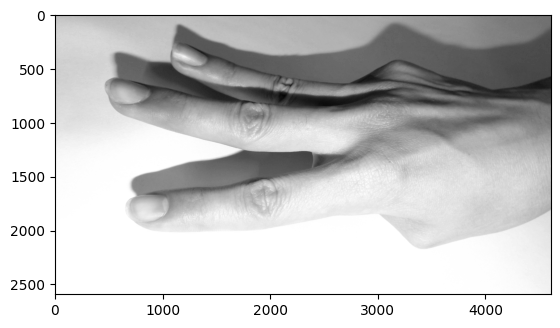

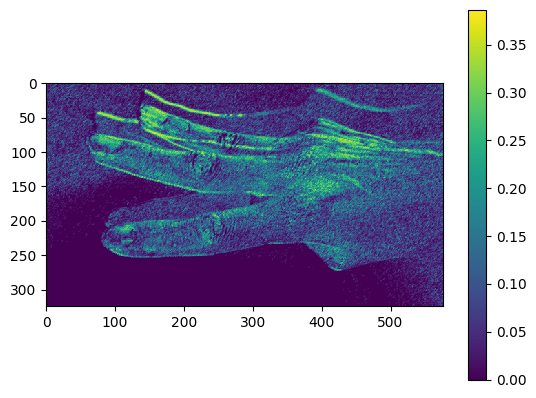

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread("D:/pattern/research/dataset_sample/men/3/3_men (2).JPG"),
                   cv2.COLOR_BGR2GRAY)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients /= cell_count

print(gradients);
# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()

In [6]:
import cv2
import numpy as np

img = cv2.imread('D:/pattern/research/dataset_sample/men/3/3_men (2).JPG', -1)

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)

True